# Kernel Functions

** from ** http://ska-fastimaging-python.readthedocs.io/en/latest/notebooks/convolutional_kernel_funcs.html#Convolution-kernel-generation

This is an attempt to get Tim Staley's Convolution Kernel codes working independedntly from his fast imaging prototype 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
# Plot image pixels in cartesian ordering (i.e. y-positive == upwards):
plt.rcParams['image.origin'] = 'lower'
# Make plots bigger
plt.rcParams['figure.figsize'] = 6, 6

In [2]:
import conv_funcs as conv_funcs

In [3]:
triangle3 = conv_funcs.Triangle(half_base_width=3.0)
pillbox = conv_funcs.Pillbox(half_base_width=2.5)
sinc = conv_funcs.Sinc(3)
gauss = conv_funcs.Gaussian(trunc=5.)
g_sinc = conv_funcs.GaussianSinc(trunc=5.)
narrow_g_sinc = conv_funcs.GaussianSinc(trunc=3.)

In [4]:
plot_radius = 10.
x=np.linspace(-plot_radius,plot_radius,501)

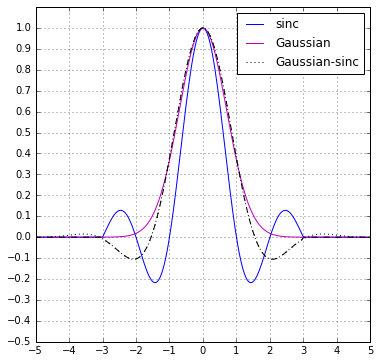

In [5]:
# %matplotlib notebook
fig = plt.figure()
ax = fig.gca()
# ax.plot(x, pillbox(x), color='r', label='pillbox')
# ax.plot(x, triangle3(x), color='g', label='triangle')

ax.set_xticks(np.arange(-5,6,1))
ax.set_yticks(np.arange(-1,1.1,0.1))
ax.plot(x, sinc(x), color='b', label='sinc')
ax.plot(x, gauss(x), color='m', label='Gaussian')
ax.plot(x, g_sinc(x), color='k', ls=':', label='Gaussian-sinc')
ax.plot(x, narrow_g_sinc(x), color='k', ls='--')
ax.grid()
ax.set_xlim(-5,5)
ax.set_ylim(-0.5,1.1)
ax.legend(loc='best')

# Convolution kernel generation

We use kernel functions to generate a small pixel-grid (‘kernel of convolution’):

In [6]:
from kernel_generation import Kernel
gs_kernel = Kernel(kernel_func=g_sinc, support=3)

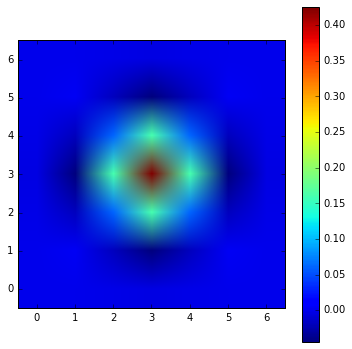

In [7]:
fig = plt.figure()
ax = fig.gca()
plt.imshow(gs_kernel.array)
plt.colorbar()

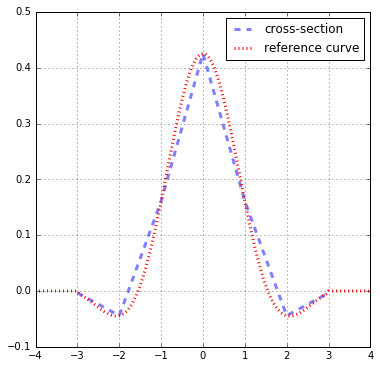

In [8]:
fig = plt.figure()
ax = fig.gca()
cross_section = gs_kernel.array[gs_kernel.centre_idx]
x_pixels_idx = np.arange(len(gs_kernel.array)) - gs_kernel.centre_idx
ax.grid()
ax.plot(x_pixels_idx, cross_section, ls='--', alpha=0.5, color='b', lw=3,
       label='cross-section')
ax.plot(x, narrow_g_sinc(x)*np.max(cross_section), ls=':', color='r', lw=3,
       label='reference curve')
ax.set_xlim(-4,4)
ax.legend(loc='upper right')